In [1]:
#!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.api as sm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./Group_7_data_cleaned.csv")

In [4]:
df.drop(columns=['Date','Time'], inplace=True)

In [5]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.77,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.65,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.52,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.39,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.25,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Temp               10129 non-null  float64
 1   S2_Temp               10129 non-null  float64
 2   S3_Temp               10129 non-null  float64
 3   S4_Temp               10129 non-null  float64
 4   S1_Light              10129 non-null  int64  
 5   S2_Light              10129 non-null  int64  
 6   S3_Light              10129 non-null  int64  
 7   S4_Light              10129 non-null  int64  
 8   S1_Sound              10129 non-null  float64
 9   S2_Sound              10129 non-null  float64
 10  S3_Sound              10129 non-null  float64
 11  S4_Sound              10129 non-null  float64
 12  S5_CO2                10129 non-null  int64  
 13  S5_CO2_Slope          10129 non-null  float64
 14  S6_PIR                10129 non-null  int64  
 15  S7_PIR             

In [7]:
df_wo_light = df.drop(df.filter(regex='Light').columns, axis=1)

In [8]:
df_wo_light.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,0.08,0.19,0.06,0.06,390,0.77,0,0,1
1,24.94,24.75,24.56,25.44,0.93,0.05,0.06,0.06,390,0.65,0,0,1
2,25.00,24.75,24.50,25.44,0.43,0.11,0.08,0.06,390,0.52,0,0,1
3,25.00,24.75,24.56,25.44,0.41,0.10,0.10,0.09,390,0.39,0,0,1
4,25.00,24.75,24.56,25.44,0.18,0.06,0.06,0.06,390,0.25,0,0,1


In [9]:
X_wo_light = df_wo_light.drop(['Room_Occupancy_Count'], axis=1)
y_wo_light = df_wo_light[['Room_Occupancy_Count']]

In [10]:
# Splitting the dataset into train and test
X_train_wo_light, X_test_wo_light, y_train_wo_light, y_test_wo_light = train_test_split(X_wo_light, y_wo_light, test_size=0.2, random_state=42)

## Variable selection using a Bi-directional elimination as a wrapper method.

Wrapper method: This is a method of variable selection that trains and evaluates a machine learning algorithm for different subsets of features and determines the most suitable subset of features that yields the highest performance. 

Here we use bi-directional elimination as a wrapper method on the "Random Forest Classifier". This wrapper method combines both forward selection and backward elimination methods. While adding a new feature, it checks the significance of already added features. If it finds any of the already selected features to be insignificant, it simply removes that particular feature through backward elimination.

In [11]:
# Sequential Forward Floating Selection(sffs)
sffs = SFS(RandomForestClassifier(),
           k_features = 9,
           forward = True,
           floating = True,
           scoring = 'accuracy',
           cv=5)
sffs.fit(X_train_wo_light,y_train_wo_light)
corr_features = list(sffs.k_feature_names_)
corr_features

['S1_Temp',
 'S2_Temp',
 'S3_Temp',
 'S4_Temp',
 'S4_Sound',
 'S5_CO2',
 'S5_CO2_Slope',
 'S6_PIR',
 'S7_PIR']

In [12]:
X_train_wo_light_corr = X_train_wo_light[corr_features]
X_train_wo_light_corr.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
1937,25.19,25.19,24.63,25.56,0.05,360,0.00,0,0
4477,25.38,25.38,24.81,25.75,0.06,365,0.00,0,0
8550,25.56,25.63,25.31,25.69,0.08,530,-2.59,0,0
1346,25.50,25.50,25.06,25.88,0.06,390,-0.64,0,0
7296,25.38,25.38,24.88,25.75,0.10,355,0.00,0,0


In [13]:
X_test_wo_light_corr = X_test_wo_light[corr_features]
X_test_wo_light_corr.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
8855,25.31,25.31,25.00,25.44,0.08,360,0.00,0,0
532,26.06,25.81,25.69,26.31,0.07,590,0.75,0,0
1155,25.69,25.75,25.31,25.94,0.06,645,-2.21,0,0
7769,25.19,25.19,24.63,25.44,0.09,350,-0.09,0,0
4922,25.19,25.19,24.63,25.50,0.06,360,-0.02,0,0


## 1. Using the selected variabels on the best model from part 2 - Random Forest

In [14]:
model_class_wo_light_rf = RandomForestClassifier(bootstrap= 'False', max_depth= 40, max_features= 'log2', n_estimators= 200)
model_class_wo_light_rf.fit(X_train_wo_light_corr, y_train_wo_light)

print("Accuracy on train set: ", model_class_wo_light_rf.score(X_train_wo_light_corr, y_train_wo_light))
print("Accuracy on test set: ", model_class_wo_light_rf.score(X_test_wo_light_corr, y_test_wo_light))

Accuracy on train set:  1.0
Accuracy on test set:  0.9970384995064165


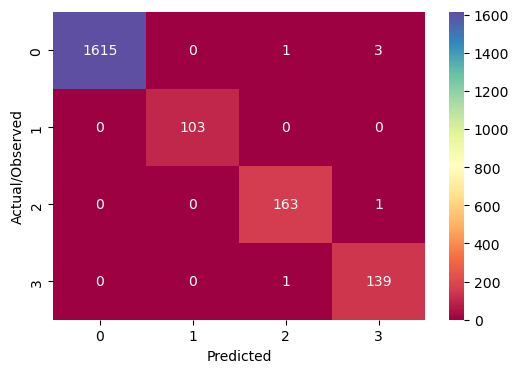

In [15]:
y_predicted_rf_corr = model_class_wo_light_rf.predict(X_test_wo_light_corr)
cm = confusion_matrix(y_test_wo_light, y_predicted_rf_corr)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [16]:
print(classification_report(y_test_wo_light, y_predicted_rf_corr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       1.00      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       0.97      0.99      0.98       140

    accuracy                           1.00      2026
   macro avg       0.99      1.00      0.99      2026
weighted avg       1.00      1.00      1.00      2026



In [17]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_predicted_rf_corr)
weighted_precision = precision_score(y_test_wo_light, y_predicted_rf_corr, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_predicted_rf_corr, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_predicted_rf_corr, average='weighted')

# Creating an evaluation metrics dataframe for the model
results = pd.DataFrame([['Random Forest using Bi-directional Elimination', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest with Variable Selection,99.7,99.71,99.7,99.71


In [18]:
# Saving the model with pickle

filename = 'rf_classification_model_with_BD.sav'
pickle.dump(model_class_wo_light_rf, open(filename, 'wb'))

## 2. Using the selected variabels on the best model from part 3 - Deep Learning

In [19]:
# Scaling the dataset
scaler = StandardScaler()
X_train_scaled_wo_light_corr = scaler.fit_transform(X_train_wo_light_corr)
X_test_scaled_wo_light_corr = scaler.transform(X_test_wo_light_corr)

In [20]:
model_class_wo_light_mlp = MLPClassifier(hidden_layer_sizes= (100, 100), learning_rate='constant', solver='adam')
model_class_wo_light_mlp.fit(X_train_scaled_wo_light_corr, y_train_wo_light)

print("Accuracy on train set: ", model_class_wo_light_mlp.score(X_train_scaled_wo_light_corr, y_train_wo_light))
print("Accuracy on test set: ", model_class_wo_light_mlp.score(X_test_scaled_wo_light_corr, y_test_wo_light))

Accuracy on train set:  0.9974083672713809
Accuracy on test set:  0.9925962487660415


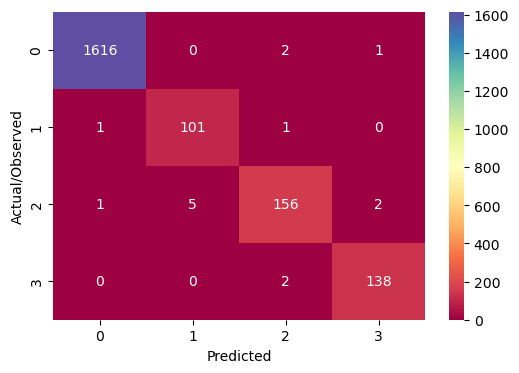

In [21]:
y_predicted_mlp_corr = model_class_wo_light_mlp.predict(X_test_scaled_wo_light_corr)
cm = confusion_matrix(y_test_wo_light, y_predicted_mlp_corr)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [22]:
print(classification_report(y_test_wo_light, y_predicted_mlp_corr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.95      0.98      0.97       103
           2       0.97      0.95      0.96       164
           3       0.98      0.99      0.98       140

    accuracy                           0.99      2026
   macro avg       0.97      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026



In [23]:
# Saving the model with pickle
filename = 'mlp_classification_model_with_BD.sav'
pickle.dump(model_class_wo_light_mlp, open(filename, 'wb'))

In [24]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_predicted_mlp_corr)
weighted_precision = precision_score(y_test_wo_light, y_predicted_mlp_corr, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_predicted_mlp_corr, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_predicted_mlp_corr, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['Deep Learning Model using Bi-directional Elimination', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest with Variable Selection,99.70,99.71,99.70,99.71
1,Deep Learning Model with Variable Selection,99.26,99.26,99.26,99.26
